### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Import the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Any missing values?
reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [5]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [6]:
# Drop unnecessary columns.
reviews_1 = reviews.drop(columns = ['language', 'platform'])

# View column names.
reviews_1.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [7]:
# Rename the column headers.
reviews_final = reviews_1.rename(columns={'remuneration (k£)':'annual_income (k£)', 
                                          'spending_score (1-100)':'spending_score', 
                                          'product':'product_code'})

# View column names.
reviews_final.columns

Index(['gender', 'age', 'annual_income (k£)', 'spending_score',
       'loyalty_points', 'education', 'product_code', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [8]:
# Create a CSV file as output.
reviews_final.to_csv('reviews_final.csv')

In [9]:
# Import new CSV file with Pandas.
reviews_fnl = pd.read_csv('reviews_final.csv', index_col=0)

# View DataFrame.
reviews_fnl.head()

,gender,age,annual_income (k£),spending_score,loyalty_points,education,product_code,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [10]:
# Sense-check the DataFrame (e.g. shape, metadata)
print(reviews_fnl.shape)
print(reviews_fnl.info())

(2000, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              2000 non-null   object 
 1   age                 2000 non-null   int64  
 2   annual_income (k£)  2000 non-null   float64
 3   spending_score      2000 non-null   int64  
 4   loyalty_points      2000 non-null   int64  
 5   education           2000 non-null   object 
 6   product_code        2000 non-null   int64  
 7   review              2000 non-null   object 
 8   summary             2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 156.2+ KB
None


In [11]:
# Any missing values?
reviews_fnl.isnull().sum()

gender                0
age                   0
annual_income (k£)    0
spending_score        0
loyalty_points        0
education             0
product_code          0
review                0
summary               0
dtype: int64

## 5. Linear regression

### 5a) spending score vs loyalty points

In [12]:
# Independent variable.
x_sslp = reviews_fnl['spending_score']

# Dependent variable.
y_sslp = reviews_fnl['loyalty_points']

# OLS model and summary.
f_sslp = 'y_sslp ~ x_sslp'
test_sslp = ols(f_sslp, data=reviews_fnl).fit()
test_sslp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_sslp   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          2.92e-263
Time:                        17:07:42   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x_sslp        33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Extract the estimated parameters.
print('Estimated parameters:\n', test_sslp.params)

# Extract the standard errors.
print('\nStandard errors:\n', test_sslp.bse)

# Extract the predicted values.
print('\nPredicted values:\n', test_sslp.predict())

Estimated parameters:
 Intercept   -75.052663
x_sslp       33.061693
dtype: float64

Standard errors:
 Intercept    45.930554
x_sslp        0.814419
dtype: float64

Predicted values:
 [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [14]:
# Set the X coefficient and the constant to generate the regression table.
x_coef_sslp = 33.061693
const_sslp = (-75.052663)
y_pred_sslp = const_sslp + x_coef_sslp * x_sslp

# View the output.
y_pred_sslp

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

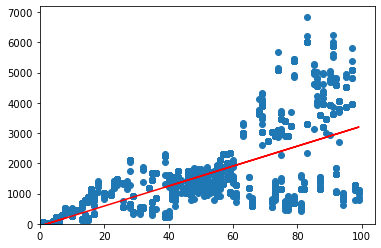

In [15]:
# Plot the graph with a regression line.
plt.scatter(x_sslp, y_sslp)

plt.plot(x_sslp, y_pred_sslp, color='red')

plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

In [16]:
# Check for heteroscedasticity:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_sslp = sms.het_breuschpagan(test_sslp.resid, test_sslp.model.exog)

# Print the results of the Breusch-Pagan test.
terms_sslp = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_sslp, test_sslp)))

# LM Test p-value = 5.042699614942239e-139 < 0.05 => we fail to accept the H0
# (the residuals are distributed with equal variance), and assume that heteroscedasticity 
# is present.

{'LM stat': 629.9823360215912, 'LM Test p-value': 5.042699614942239e-139, 'F-stat': 918.7507142907729, 'F-test p-value': 2.3037887924497478e-166}


**Reduce heteroscedasticity:**

**a) perform a log transformation on the dependent variable (y = loyalty_points):**

In [17]:
# Perform a log transformation on the dependent variable (y = loyalty_points) for reducing 
# heteroscedasticity. 

# Add a column to the DataFrame with log10 of the dependent variable (y).
reviews_fnl['loyalty_points_log10'] = np.log10(reviews_fnl['loyalty_points'])

# View DataFrame.
reviews_fnl.head()

,gender,age,annual_income (k£),spending_score,loyalty_points,education,product_code,review,summary,loyalty_points_log10
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,2.322219
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,2.719331
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",1.602060
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,2.749736
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap,2.563481


In [18]:
# Independent variable.
x_sslp = reviews_fnl['spending_score']

# Dependent variable.
y_sslp_log10 = reviews_fnl['loyalty_points_log10']

# OLS model and summary.
f_sslp_log10 = 'y_sslp_log10 ~ x_sslp'
test_sslp_log10 = ols(f_sslp_log10, data=reviews_fnl).fit()
test_sslp_log10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           y_sslp_log10   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     2153.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          1.44e-319
Time:                        17:07:42   Log-Likelihood:                -478.62
No. Observations:                2000   AIC:                             961.2
Df Residuals:                    1998   BIC:                             972.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4207      0.015    162.833      0.000       2.392       2.450
x_sslp         0.0122      0.000     46.400      0.000       0.012       0.013
==============================================================================
Omnibus:                      247.764   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              344.804
Skew:                          -1.000   Prob(JB):                     1.34e-75
Kurtosis:                       3.366   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Set the X coefficient and the constant to generate the regression table.
x_coef_sslp_log10 = 0.0122
const_sslp_log10 = 2.4207
y_pred_sslp_log10 = const_sslp_log10 + x_coef_sslp_log10 * x_sslp

# View the output.
y_pred_sslp_log10

0       2.8965
1       3.4089
2       2.4939
3       3.3601
4       2.9087
         ...  
1995    3.2625
1996    2.5183
1997    3.5309
1998    2.6159
1999    2.5183
Name: spending_score, Length: 2000, dtype: float64

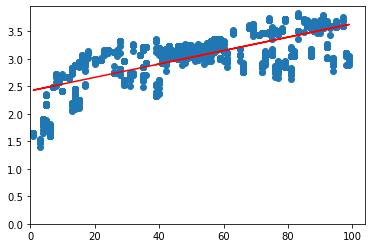

In [20]:
# Plot the graph with a regression line.
plt.scatter(x_sslp, y_sslp_log10)

plt.plot(x_sslp, y_pred_sslp_log10, color='red')

plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

In [21]:
# Check for heteroscedasticity:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_sslp_log10 = sms.het_breuschpagan(test_sslp_log10.resid, test_sslp_log10.model.exog)

# Print the results of the Breusch-Pagan test.
terms_sslp_log10 = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_sslp_log10, test_sslp_log10)))

# LM Test p-value = 6.900660585139142e-22 < 0.05 => we fail to accept the H0
# (the residuals are distributed with equal variance), and assume that heteroscedasticity 
# is present.

{'LM stat': 92.45116941985287, 'LM Test p-value': 6.900660585139142e-22, 'F-stat': 96.83497142491899, 'F-test p-value': 2.404357715981202e-22}


**b) fit Weighted Least Squares (WLS) model; use weight = 1/(y_pred_sslp squared):**

In [22]:
# Fit Weighted Least Squares (WLS) model.
# Define weights to use (= 1/(y_pred_sslp squared)).
wt = 1 / ols(f_sslp, data=reviews_fnl).fit().fittedvalues**2

X = sm.add_constant(x_sslp)

test_sslp_wls = sm.WLS(y_sslp, X, weights=wt).fit()

# View WLS summary.
print(test_sslp_wls.summary())

                            WLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.738
Model:                            WLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     5635.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:07:42   Log-Likelihood:                -15853.
No. Observations:                2000   AIC:                         3.171e+04
Df Residuals:                    1998   BIC:                         3.172e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -41.7654      3.140    -13.

In [23]:
# Check for heteroscedasticity:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_sslp_wls = sms.het_breuschpagan(test_sslp_wls.resid, test_sslp_wls.model.exog)

# Print the results of the Breusch-Pagan test.
terms_sslp_wls = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_sslp_wls, test_sslp_wls)))

# LM Test p-value = 2.3172764822918004e-140 < 0.05 => we fail to accept the H0
# (the residuals are distributed with equal variance), and assume that heteroscedasticity 
# is present.

{'LM stat': 636.1329189315552, 'LM Test p-value': 2.3172764822918004e-140, 'F-stat': 931.9042813391748, 'F-test p-value': 2.5596122299055524e-168}


**c) fit Weighted Least Squares (WLS) model; use weight = 1/(x_sslp squared):**

In [24]:
# Fit Weighted Least Squares (WLS) Model.
# Define weights to use (= 1/(x_sslp squared)).
x_sslp_wt = reviews_fnl['spending_score']**2
wt = 1 / x_sslp_wt

X = sm.add_constant(x_sslp)

test_sslp_wls1 = sm.WLS(y_sslp, X, weights=wt).fit()

# View WLS summary.
print(test_sslp_wls1.summary())

                            WLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.758
Model:                            WLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     6269.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:07:42   Log-Likelihood:                -15770.
No. Observations:                2000   AIC:                         3.154e+04
Df Residuals:                    1998   BIC:                         3.156e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.1995      3.683      0.

In [25]:
# Check for heteroscedasticity:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_sslp_wls1 = sms.het_breuschpagan(test_sslp_wls1.resid, test_sslp_wls1.model.exog)

# Print the results of the Breusch-Pagan test.
terms_sslp_wls1 = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_sslp_wls1, test_sslp_wls1)))

# LM Test p-value = 1.3336790126857622e-138 < 0.05 => we fail to accept the H0
# (the residuals are distributed with equal variance), and assume that heteroscedasticity 
# is present.

{'LM stat': 628.0402441854413, 'LM Test p-value': 1.3336790126857622e-138, 'F-stat': 914.6218776202358, 'F-test p-value': 9.499513579477449e-166}


**d) split reviews_fnl DataFrame by selecting rows with spending score values <= 60 and fit OLS model again:**

In [26]:
# Select rows with spending score values <= 60 from reviews_fnl DataFrame.
reviews_fnl_60 = reviews_fnl[reviews_fnl['spending_score'] <= 60].reset_index()

# View DataFrame (1367 entries included out of 2000 entries in reviews_fnl DataFrame).
reviews_fnl_60.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 1367 non-null   int64  
 1   gender                1367 non-null   object 
 2   age                   1367 non-null   int64  
 3   annual_income (k£)    1367 non-null   float64
 4   spending_score        1367 non-null   int64  
 5   loyalty_points        1367 non-null   int64  
 6   education             1367 non-null   object 
 7   product_code          1367 non-null   int64  
 8   review                1367 non-null   object 
 9   summary               1367 non-null   object 
 10  loyalty_points_log10  1367 non-null   float64
dtypes: float64(2), int64(5), object(4)
memory usage: 117.6+ KB


In [27]:
# Independent variable.
x_sslp_60 = reviews_fnl_60['spending_score']

# Dependent variable.
y_sslp_60 = reviews_fnl_60['loyalty_points']

# OLS model and summary.
f_sslp_60 = 'y_sslp_60 ~ x_sslp_60'
test_sslp_60 = ols(f_sslp_60, data=reviews_fnl_60).fit()
test_sslp_60.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              y_sslp_60   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     2055.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          1.74e-274
Time:                        17:07:43   Log-Likelihood:                -10015.
No. Observations:                1367   AIC:                         2.003e+04
Df Residuals:                    1365   BIC:                         2.005e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    157.8290     22.483      7.020      0.000     113.725     201.933
x_sslp_60     25.5150      0.563     45.327      0.000      24.411      26.619
==============================================================================
Omnibus:                       29.904   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.134
Skew:                           0.335   Prob(JB):                     1.05e-07
Kurtosis:                       3.340   Cond. No.                         90.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# Check for heteroscedasticity:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_sslp_60 = sms.het_breuschpagan(test_sslp_60.resid, test_sslp_60.model.exog)

# Print the results of the Breusch-Pagan test.
terms_sslp_60 = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_sslp_60, test_sslp_60)))

# LM Test p-value = 0.3943642106649826 > 0.05 => we fail to reject the H0
# (the residuals are distributed with equal variance), and assume homoscedasticity.

{'LM stat': 0.7254432417142823, 'LM Test p-value': 0.3943642106649826, 'F-stat': 0.7247664973644982, 'F-test p-value': 0.39473417092266727}


**e) split reviews_fnl DataFrame by selecting rows with spending score values > 60 and fit OLS model again:**

In [29]:
# Select rows with spending score values > 60 from reviews_fnl DataFrame.
reviews_fnl_61 = reviews_fnl[reviews_fnl['spending_score'] > 60].reset_index()

# View DataFrame (633 entries included out of 2000 entries in reviews_fnl DataFrame).
reviews_fnl_61.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 633 non-null    int64  
 1   gender                633 non-null    object 
 2   age                   633 non-null    int64  
 3   annual_income (k£)    633 non-null    float64
 4   spending_score        633 non-null    int64  
 5   loyalty_points        633 non-null    int64  
 6   education             633 non-null    object 
 7   product_code          633 non-null    int64  
 8   review                633 non-null    object 
 9   summary               633 non-null    object 
 10  loyalty_points_log10  633 non-null    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 54.5+ KB


In [30]:
# Independent variable.
x_sslp_61 = reviews_fnl_61['spending_score']

# Dependent variable.
y_sslp_61 = reviews_fnl_61['loyalty_points']

# OLS model and summary.
f_sslp_61 = 'y_sslp_61 ~ x_sslp_61'
test_sslp_61 = ols(f_sslp_61, data=reviews_fnl_61).fit()
test_sslp_61.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              y_sslp_61   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     58.35
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           8.15e-14
Time:                        17:07:43   Log-Likelihood:                -5559.3
No. Observations:                 633   AIC:                         1.112e+04
Df Residuals:                     631   BIC:                         1.113e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1171.9856    507.081     -2.311      0.021   -2167.756    -176.215
x_sslp_61     47.6652      6.240      7.639      0.000      35.412      59.918
==============================================================================
Omnibus:                      276.221   Durbin-Watson:                   0.384
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.605
Skew:                           0.073   Prob(JB):                     3.06e-08
Kurtosis:                       1.864   Cond. No.                         656.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# Check for heteroscedasticity:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_sslp_61 = sms.het_breuschpagan(test_sslp_61.resid, test_sslp_61.model.exog)

# Print the results of the Breusch-Pagan test.
terms_sslp_61 = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_sslp_61, test_sslp_61)))

# LM Test p-value = 7.250135584741414e-11 < 0.05 => we fail to accept the H0
# (the residuals are distributed with equal variance), and assume that heteroscedasticity 
# is present.

{'LM stat': 42.450298264357265, 'LM Test p-value': 7.250135584741414e-11, 'F-stat': 45.35797431796883, 'F-test p-value': 3.6981508740877824e-11}


In [32]:
# Perform a log transformation on the dependent variable (y = loyalty_points) for reducing 
# heteroscedasticity. 

# Independent variable.
x_sslp_61 = reviews_fnl_61['spending_score']

# Dependent variable.
y_sslp_log10_61 = reviews_fnl_61['loyalty_points_log10']

# OLS model and summary.
f_sslp_log10_61 = 'y_sslp_log10_61 ~ x_sslp_61'
test_sslp_log10_61 = ols(f_sslp_log10_61, data=reviews_fnl_61).fit()
test_sslp_log10_61.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        y_sslp_log10_61   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     46.29
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           2.37e-11
Time:                        17:07:43   Log-Likelihood:                -169.69
No. Observations:                 633   AIC:                             343.4
Df Residuals:                     631   BIC:                             352.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6325      0.102     25.885      0.000       2.433       2.832
x_sslp_61      0.0085      0.001      6.804      0.000       0.006       0.011
==============================================================================
Omnibus:                     2258.463   Durbin-Watson:                   0.294
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.625
Skew:                          -0.379   Prob(JB):                     2.52e-14
Kurtosis:                       1.658   Cond. No.                         656.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# Check for heteroscedasticity:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_sslp_log10_61 = sms.het_breuschpagan(test_sslp_log10_61.resid, 
                                          test_sslp_log10_61.model.exog)

# Print the results of the Breusch-Pagan test.
terms_sslp_log10_61 = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_sslp_log10_61, test_sslp_log10_61)))

# LM Test p-value = 0.23234078380154152 > 0.05 => we fail to reject the H0
# (the residuals are distributed with equal variance), and assume homoscedasticity.

{'LM stat': 1.4264737726632337, 'LM Test p-value': 0.23234078380154152, 'F-stat': 1.4251784046858507, 'F-test p-value': 0.2330015513333428}


### 5b) annual income (k£) vs loyalty points

In [34]:
# Independent variable.
x_ailp = reviews_fnl['annual_income (k£)']

# Dependent variable.
y_ailp = reviews_fnl['loyalty_points']

# OLS model and summary.
f_ailp = 'y_ailp ~ x_ailp'
test_ailp = ols(f_ailp, data=reviews_fnl).fit()
test_ailp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_ailp   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          2.43e-209
Time:                        17:07:43   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x_ailp        34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# Extract the estimated parameters.
print('Estimated parameters:\n', test_ailp.params)

# Extract the standard errors.
print('\nStandard errors:\n', test_ailp.bse)

# Extract the predicted values.
print('\nPredicted values:\n', test_ailp.predict())

Estimated parameters:
 Intercept   -65.686513
x_ailp       34.187825
dtype: float64

Standard errors:
 Intercept    52.170717
x_ailp        0.977925
dtype: float64

Predicted values:
 [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [36]:
# Set the X coefficient and the constant to generate the regression table.
x_coef_ailp = 34.187825
const_ailp = (-65.686513)
y_pred_ailp = const_ailp + x_coef_ailp * x_ailp

# View the output.
y_pred_ailp

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: annual_income (k£), Length: 2000, dtype: float64

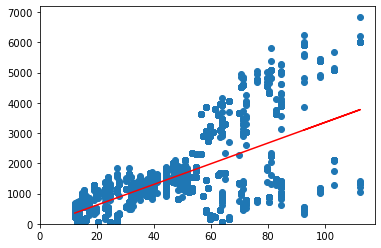

In [37]:
# Plot the graph with a regression line.
plt.scatter(x_ailp, y_ailp)

plt.plot(x_ailp, y_pred_ailp, color='red')

plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

In [38]:
# Check for heteroscedasticity:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_ailp = sms.het_breuschpagan(test_ailp.resid, test_ailp.model.exog)

# Print the results of the Breusch-Pagan test.
terms_ailp = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_ailp, test_ailp)))

# LM Test p-value = 7.153051772822205e-228 < 0.05 => we fail to accept the H0
# (the residuals are distributed with equal variance), and assume that heteroscedasticity 
# is present.

{'LM stat': 1038.6445487288283, 'LM Test p-value': 7.153051772822205e-228, 'F-stat': 2158.6311344219334, 'F-test p-value': 3.68e-320}


In [39]:
# Independent variable.
x_ailp1 = reviews_fnl['annual_income (k£)']

# Dependent variable.
y_ailp1 = reviews_fnl['loyalty_points_log10']

# OLS model and summary.
f_ailp1 = 'y_ailp1 ~ x_ailp1'
test_ailp1 = ols(f_ailp1, data=reviews_fnl).fit()
test_ailp1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_ailp1   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     794.3
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          1.98e-147
Time:                        17:07:43   Log-Likelihood:                -875.08
No. Observations:                2000   AIC:                             1754.
Df Residuals:                    1998   BIC:                             1765.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5408      0.019    131.318      0.000       2.503       2.579
x_ailp1        0.0102      0.000     28.184      0.000       0.010       0.011
==============================================================================
Omnibus:                      610.463   Durbin-Watson:                   2.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1512.287
Skew:                          -1.669   Prob(JB):                         0.00
Kurtosis:                       5.647   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# Extract the estimated parameters.
print('Estimated parameters:\n', test_ailp1.params)

# Extract the standard errors.
print('\nStandard errors:\n', test_ailp1.bse)

# Extract the predicted values.
print('\nPredicted values:\n', test_ailp1.predict())

Estimated parameters:
 Intercept    2.540847
x_ailp1      0.010222
dtype: float64

Standard errors:
 Intercept    0.019349
x_ailp1      0.000363
dtype: float64

Predicted values:
 [2.66657752 2.66657752 2.67495956 ... 3.48801698 3.54669122 3.48801698]


In [41]:
# Set the X coefficient and the constant to generate the regression table.
x_coef_ailp1 = 0.010222
const_ailp1 = 2.540847
y_pred_ailp1 = const_ailp1 + x_coef_ailp1 * x_ailp1

# View the output.
y_pred_ailp

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: annual_income (k£), Length: 2000, dtype: float64

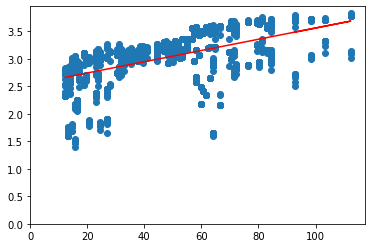

In [42]:
# Plot the graph with a regression line.
plt.scatter(x_ailp1, y_ailp1)

plt.plot(x_ailp1, y_pred_ailp1, color='red')

plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

In [43]:
# Check for heteroscedasticity:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_ailp1 = sms.het_breuschpagan(test_ailp1.resid, test_ailp1.model.exog)

# Print the results of the Breusch-Pagan test.
terms_ailp1 = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_ailp1, test_ailp1)))

# LM Test p-value = 0.8272107748026084 > 0.05 => we fail to reject the H0
# (the residuals are distributed with equal variance), and assume homoscedasticity.

{'LM stat': 0.04764626018283202, 'LM Test p-value': 0.8272107748026084, 'F-stat': 0.04759974789772982, 'F-test p-value': 0.8273160836318402}


### 5c) age vs loyalty points

In [44]:
# Independent variable.
x_alp = reviews_fnl['age']

# Dependent variable.
y_alp = reviews_fnl['loyalty_points']

# OLS model and summary.
f_alp = 'y_alp ~ x_alp'
test_alp = ols(f_alp, data=reviews_fnl).fit()
test_alp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_alp   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 13 Nov 2022   Prob (F-statistic):             0.0577
Time:                        17:07:43   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x_alp         -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Extract the estimated parameters.
print('Estimated parameters:\n', test_alp.params )

# Extract the standard errors.
print('\nStandard errors:\n', test_alp.bse)

# Extract the predicted values.
print('\nPredicted values:\n', test_alp.predict())

Estimated parameters:
 Intercept    1736.517739
x_alp          -4.012805
dtype: float64

Standard errors:
 Intercept    88.248731
x_alp         2.113177
dtype: float64

Predicted values:
 [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [46]:
# Set the X coefficient and the constant to generate the regression table.
x_coef_alp = (-4.012805)
const_alp = 1736.517739
y_pred_alp = const_alp + x_coef_alp * x_alp

# View the output.
y_pred_alp

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

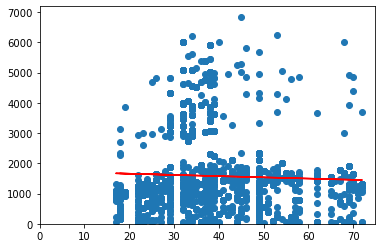

In [47]:
# Plot the graph with a regression line.
plt.scatter(x_alp, y_alp)

plt.plot(x_alp, y_pred_alp, color='red')

plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

In [48]:
# Check for heteroscedasticity:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_alp = sms.het_breuschpagan(test_alp.resid, test_alp.model.exog)

# Print the results of the Breusch-Pagan test.
terms_alp = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_alp, test_alp)))

# LM Test p-value = 0.00030407066519251314 < 0.05 => we fail to accept the H0
# (the residuals are distributed with equal variance), and assume that heteroscedasticity 
# is present.

{'LM stat': 13.045150861307642, 'LM Test p-value': 0.00030407066519251314, 'F-stat': 13.11766668084642, 'F-test p-value': 0.0002998192355800465}


In [49]:
# Independent variable.
x_alp1 = reviews_fnl['age']

# Dependent variable.
y_alp1 = reviews_fnl['loyalty_points_log10']

# OLS model and summary.
f_alp1 = 'y_alp1 ~ x_alp1'
test_alp1 = ols(f_alp1, data=reviews_fnl).fit()
test_alp1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_alp1   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.393
Date:                Sun, 13 Nov 2022   Prob (F-statistic):              0.122
Time:                        17:07:43   Log-Likelihood:                -1208.6
No. Observations:                2000   AIC:                             2421.
Df Residuals:                    1998   BIC:                             2432.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0769      0.030    100.926      0.000       3.017       3.137
x_alp1        -0.0011      0.001     -1.547      0.122      -0.003       0.000
==============================================================================
Omnibus:                      392.087   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              748.718
Skew:                          -1.180   Prob(JB):                    2.62e-163
Kurtosis:                       4.847   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Extract the estimated parameters.
print('Estimated parameters:\n', test_alp1.params )

# Extract the standard errors.
print('\nStandard errors:\n', test_alp1.bse)

# Extract the predicted values.
print('\nPredicted values:\n', test_alp1.predict())

Estimated parameters:
 Intercept    3.076916
x_alp1      -0.001129
dtype: float64

Standard errors:
 Intercept    0.030487
x_alp1       0.000730
dtype: float64

Predicted values:
 [3.05658701 3.05094008 3.05206946 ... 3.03851684 3.03851684 3.04077561]


In [51]:
# Set the X coefficient and the constant to generate the regression table.
x_coef_alp1 = (-0.001129)
const_alp1 = 3.076916
y_pred_alp1 = const_alp1 + x_coef_alp1 * x_alp1

# View the output.
y_pred_alp1

0       3.056594
1       3.050949
2       3.052078
3       3.048691
4       3.039659
          ...   
1995    3.035143
1996    3.028369
1997    3.038530
1998    3.038530
1999    3.040788
Name: age, Length: 2000, dtype: float64

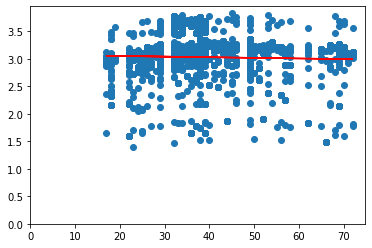

In [52]:
# Plot the graph with a regression line.
plt.scatter(x_alp1, y_alp1)

plt.plot(x_alp1, y_pred_alp1, color='red')

plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

In [53]:
# Check for heteroscedasticity:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_alp1 = sms.het_breuschpagan(test_alp1.resid, test_alp1.model.exog)

# Print the results of the Breusch-Pagan test.
terms_alp1 = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_alp1, test_alp1)))

# LM Test p-value = 0.16765562765447406 > 0.05 => we fail to reject the H0
# (the residuals are distributed with equal variance), and assume homoscedasticity.

{'LM stat': 1.9037817803251311, 'LM Test p-value': 0.16765562765447406, 'F-stat': 1.9036901038123868, 'F-test p-value': 0.16782024254716696}


### Additional question: a) annual income (k£) vs spending score

In [54]:
# Independent variable.
x_aiss = reviews_fnl['annual_income (k£)']

# Dependent variable.
y_aiss = reviews_fnl['spending_score']

# OLS model and summary.
f_aiss = 'y_aiss ~ x_aiss'
test_aiss = ols(f_aiss, data=reviews_fnl).fit()
test_aiss.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_aiss   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.06294
Date:                Sun, 13 Nov 2022   Prob (F-statistic):              0.802
Time:                        17:07:44   Log-Likelihood:                -9360.8
No. Observations:                2000   AIC:                         1.873e+04
Df Residuals:                    1998   BIC:                         1.874e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.6955      1.347     36.899      0.000      47.054      52.337
x_aiss         0.0063      0.025      0.251      0.802      -0.043       0.056
==============================================================================
Omnibus:                      256.861   Durbin-Watson:                   3.699
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.806
Skew:                          -0.044   Prob(JB):                     3.11e-15
Kurtosis:                       2.109   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Extract the estimated parameters.
print('Estimated parameters:\n', test_aiss.params )

# Extract the standard errors.
print('\nStandard errors:\n', test_aiss.bse)

# Extract the predicted values.
print('\nPredicted values:\n', test_aiss.predict())

Estimated parameters:
 Intercept    49.695490
x_aiss        0.006334
dtype: float64

Standard errors:
 Intercept    1.346809
x_aiss       0.025246
dtype: float64

Predicted values:
 [49.77339247 49.77339247 49.77858596 ... 50.28235444 50.31870887
 50.28235444]


In [56]:
# Set the X coefficient and the constant to generate the regression table.
x_coef_aiss = 0.006334
const_aiss = 49.695490
y_pred_aiss = const_aiss + x_coef_aiss * x_aiss

# View the output.
y_pred_aiss

0       49.773398
1       49.773398
2       49.778592
3       49.778592
4       49.783786
          ...    
1995    50.230460
1996    50.282398
1997    50.282398
1998    50.318756
1999    50.282398
Name: annual_income (k£), Length: 2000, dtype: float64

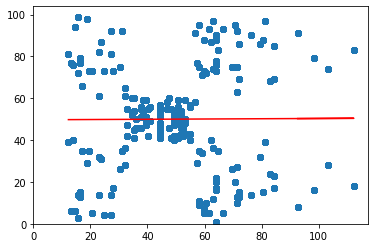

In [57]:
# Plot the graph with a regression line.
plt.scatter(x_aiss, y_aiss)

plt.plot(x_aiss, y_pred_aiss, color='red')

plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### Additional question: b) spending score and annual income (k£) vs loyalty points

In [58]:
# Define the independent variable.
X_salp = reviews_fnl[['spending_score', 'annual_income (k£)']] 

# Define the dependent variable.
y_salp = reviews_fnl['loyalty_points'] 

# OLS model and summary.
f_salp = 'y_salp ~ X_salp'
test_salp = ols(f_salp, data=reviews_fnl).fit()
test_salp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_salp   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     4770.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:07:44   Log-Likelihood:                -15398.
No. Observations:                2000   AIC:                         3.080e+04
Df Residuals:                    1997   BIC:                         3.082e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1700.3051     35.740    -47.575      0.000   -1770.396   -1630.214
X_salp[0]     32.8927      0.458     71.845      0.000      31.995      33.791
X_salp[1]     33.9795      0.517     65.769      0.000      32.966      34.993
==============================================================================
Omnibus:                        4.723   Durbin-Watson:                   3.477
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                4.650
Skew:                           0.103   Prob(JB):                       0.0978
Kurtosis:                       3.115   Cond. No.                         220.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# Extract the estimated parameters.
print('Estimated parameters:\n', test_salp.params )

# Extract the standard errors.
print('\nStandard errors:\n', test_salp.bse)

# Extract the predicted values.
print('\nPredicted values:\n', test_salp.predict())

Estimated parameters:
 Intercept   -1700.305097
X_salp[0]      32.892695
X_salp[1]      33.979499
dtype: float64

Standard errors:
 Intercept    35.739558
X_salp[0]     0.457831
X_salp[1]     0.516648
dtype: float64

Predicted values:
 [ 4.57831319e-01  1.38195101e+03 -1.05713790e+03 ...  4.44147048e+03
  2.16956070e+03  1.71137682e+03]


In [60]:
# Check for multicollinearity:
# Add a constant.
x_temp = sm.add_constant(X_salp)  

# Create an empty DataFrame. 
vif = pd.DataFrame() 

# Calculate the 'vif' for each value.
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, 
                                               i) for i in range(x_temp.values.shape[1])]  


# Create the feature columns.
vif['features'] = x_temp.columns  

# Print the values to two decimal points.
print(vif.round(2))  

# VIF Factors for spending score and annual income = 1 => no correlation between independent
# variables. 

   VIF Factor            features
0        8.95               const
1        1.00      spending_score
2        1.00  annual_income (k£)


In [61]:
# Check for heteroscedasticity:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_salp = sms.het_breuschpagan(test_salp.resid, test_salp.model.exog)

# Print the results of the Breusch-Pagan test.
terms_salp = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_salp, test_salp)))

# LM Test p-value = 2.154885846504576e-12 < 0.05 => we fail to accept the H0
# (the residuals are distributed with equal variance), and assume that heteroscedasticity 
# is present.

{'LM stat': 53.726566730470935, 'LM Test p-value': 2.154885846504576e-12, 'F-stat': 27.56343274452234, 'F-test p-value': 1.5545263629723393e-12}


In [62]:
# Define the independent variable.
X_salp1 = reviews_fnl[['spending_score', 'annual_income (k£)']] 

# Define the dependent variable.
y_salp1 = reviews_fnl['loyalty_points_log10'] 

# OLS model and summary.
f_salp1 = 'y_salp1 ~ X_salp1'
test_salp1 = ols(f_salp1, data=reviews_fnl).fit()
test_salp1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_salp1   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     3965.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:07:44   Log-Likelihood:                 393.90
No. Observations:                2000   AIC:                            -781.8
Df Residuals:                    1997   BIC:                            -765.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9355      0.013    145.462      0.000       1.909       1.962
X_salp1[0]     0.0122      0.000     71.461      0.000       0.012       0.013
X_salp1[1]     0.0101      0.000     52.741      0.000       0.010       0.011
==============================================================================
Omnibus:                      577.517   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1749.729
Skew:                          -1.465   Prob(JB):                         0.00
Kurtosis:                       6.524   Cond. No.                         220.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# Check for heteroscedasticity:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_salp1 = sms.het_breuschpagan(test_salp1.resid, test_salp1.model.exog)

# Print the results of the Breusch-Pagan test.
terms_salp1 = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_salp1, test_salp1)))

# LM Test p-value = 3.677722072049437e-35 < 0.05 => we fail to accept the H0
# (the residuals are distributed with equal variance), and assume that heteroscedasticity 
# is present.

{'LM stat': 158.57636939286434, 'LM Test p-value': 3.677722072049437e-35, 'F-stat': 85.98700603541694, 'F-test p-value': 1.5049803293123268e-36}


## 6. Observations and insights

**Spending score vs loyalty points:**

Despite the overall positive relationship between spending score and loyalty points variables, the high level of heteroskedasticity in the residuals made the regression model estimators inefficient. The decision was made to split the data set into two groups: spending score <= 60 and spending score > 60:

**a) spending score (<= 60) vs loyalty points:**

R-squared = 0.601 => 60.1% of the total variability of y (loyalty points), is explained by the variability of x (spending score (<= 60));

Prob (F-statistic) = 1.74e-274 => this is p-value; it is less than 0.05. Therefore, the p-value is significant (observed difference could not have happened by chance);

Coefficient of x = 25.5150 => if the spending score (<= 60) (x) increases by 1 unit, the number of loyalty points (y) will increase by 25.5150 units;

t-value tests (P>|t|) = 0 => it is < 0.05, thus the estimated slope is significant.

[0.025	0.975] describe the 95% confidence interval of the true x coefficient, i.e. the true slope. For instance, if we take a different sample, the estimated slope will be slightly different. If we take 100 random samples each of 500 observations of x and y, then 95 out of the 100 samples will derive a slope that is within the interval (24.411, 26.619).

**b) spending score (> 60) vs log10 of loyalty points:**

High level of heteroskedasticity in the residuals was detected when a relationship between spending score (> 60) and loyalty points variables was investigated. It was fixed by using a log transformation on the dependent variable (loyalty points).

R-squared = 0.068 => 6.8% of the total variability of y (log10 of loyalty points), is explained by the variability of x (spending score (> 60));

Prob (F-statistic) = 2.37e-11 => this is p-value; it is less than 0.05. Therefore, the p-value is significant (observed difference could not have happened by chance);

Coefficient of x = 0.0085 => if the spending score (> 60) (x) increases by 1 unit, the log10 of loyalty points (y) will increase by 0.0085 units;

t-value tests (P>|t|) = 0 => it is < 0.05, thus the estimated slope is significant.

[0.025	0.975] describe the 95% confidence interval of the true x coefficient, i.e. the true slope. For instance, if we take a different sample, the estimated slope will be slightly different. If we take 100 random samples each of 500 observations of x and y, then 95 out of the 100 samples will derive a slope that is within the interval (0.006, 0.011).

**Annual income vs log10 of loyalty points:**

High level of heteroskedasticity in the residuals was detected when a relationship between annual income and loyalty points variables was investigated. It was fixed by using a log transformation on the dependent variable (loyalty points).

R-squared = 0.284 => 28.4% of the total variability of y (loyalty points), is explained by the variability of x (annual income);

Prob (F-statistic) = 1.98e-147 => this is p-value; it is less than 0.05. Therefore, the p-value is significant (observed difference could not have happened by chance);

Coefficient of x = 0.0102 => if the annual income (x) increases by 1 unit (= £1,000), the log10 of loyalty points (y) will increase by 0.0102 units;

t-value tests (P>|t|) = 0 => it is < 0.05, thus the estimated slope is significant.

[0.025	0.975] describe the 95% confidence interval of the true x coefficient, i.e. the true slope. For instance, if we take a different sample, the estimated slope will be slightly different. If we take 100 random samples each of 500 observations of x and y, then 95 out of the 100 samples will derive a slope that is within the interval (0.010, 0.011).

**Age vs log10 of loyalty points:**

High level of heteroskedasticity in the residuals was detected when a relationship between age and loyalty points variables was investigated. It was fixed by using a log transformation on the dependent variable (loyalty points).

R-squared = 0.001 => 0.1% of the total variability of y (log10 of loyalty points), is explained by the variability of x (age);

Prob (F-statistic) = 0.122 => this is p-value; it is more than 0.05. Therefore, the p-value is insignificant (observed difference could have happened by chance);

Coefficient of x = -0.0011 => if the age (x) increases by 1 unit (= 1 year), the log10 of loyalty points (y) will decrease by 0.0011 units;

t-value tests (P>|t|) = -1.547 => it is < 0.05, thus the estimated slope is significant.

[0.025	0.975] describe the 95% confidence interval of the true x coefficient, i.e. the true slope. For instance, if we take a different sample, the estimated slope will be slightly different. If we take 100 random samples each of 500 observations of x and y, then 95 out of the 100 samples will derive a slope that is within the interval (-0.003, 0.000).

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [64]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [65]:
# Load the CSV file(s) as df2.


# View DataFrame.


In [66]:
# Drop unnecessary columns.


# View DataFrame.


In [67]:
# Explore the data.


In [68]:
# Descriptive statistics.


## 2. Plot

In [69]:
# Create a scatterplot with Seaborn.


In [70]:
# Create a pairplot with Seaborn.


## 3. Elbow and silhoutte methods

In [71]:
# Determine the number of clusters: Elbow method.


In [72]:
# Determine the number of clusters: Silhouette method.


## 4. Evaluate k-means model at different values of *k*

## 5. Fit final model and justify your choice

In [73]:
# Apply the final model.


In [74]:
# Check the number of observations per predicted class.


## 6. Plot and interpret the clusters

In [75]:
# Visualising the clusters.


# View the DataFrame.


In [76]:
# Visualising the clusters.



## 7. Discuss: Insights and observations

***Your observations here...***

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [77]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
# Load the data set as df3.


# View DataFrame.


In [ ]:
# Explore data set.


In [ ]:
# Keep necessary columns. Drop unnecessary columns.


# View DataFrame.


In [ ]:
# Determine if there are any missing values.


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [ ]:
# Review: Change all to lower case and join with a space.


In [ ]:
# Summary: Change all to lower case and join with a space.


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [ ]:
# Replace all the punctuations in review column.


# View output.


In [ ]:
# Replace all the puncuations in summary column.


# View output.


### 2c) Drop duplicates in both columns

In [ ]:
# Drop duplicates in both columns.


# View DataFrame.


## 3. Tokenise and create wordclouds

In [ ]:
# Create new DataFrame (copy DataFrame).


# View DataFrame.


In [ ]:
# Apply tokenisation to both columns.


# View DataFrame.


In [ ]:
# Review: Create a word cloud.


In [ ]:
# Review: Plot the WordCloud image.


In [ ]:
# Summary: Create a word cloud.


In [ ]:
# Summary: Plot the WordCloud image.


## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [ ]:
# Determine the frequency distribution.


### 4b) Remove alphanumeric characters and stopwords

In [ ]:
# Delete all the alpanum.


In [ ]:
# Remove all the stopwords


### 4c) Create wordcloud without stopwords

In [ ]:
# Create a wordcloud without stop words.


In [ ]:
# Plot the wordcloud image.


### 4d) Identify 15 most common words and polarity

In [ ]:
# Determine the 15 most common words.


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [ ]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [ ]:
# Determine polarity of both columns. 


# View output.


In [ ]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score


In [ ]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [ ]:
# Top 20 negative reviews.


# View output.


In [ ]:
# Top 20 negative summaries.


# View output.


In [ ]:
# Top 20 positive reviews.


# View output.


In [ ]:
# Top 20 positive summaries.


# View output.


## 7. Discuss: Insights and observations

***Your observations here...***

# 